## Test Run of Regional and National Briefings
#### Author: Smitha Mahesh 
### Purpose: To test run the template to automate the production of 7 regional briefings and 8 regional briefings. I started using the actual datafile completed by Sophie to be able to test all variables of interest.

In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
myworkingdirectory = r"H:\NPS TSP Project"
#Jupyter Notebook does not allow using a sharepoint link for the working directory. You have to download the file and then reroute to your working directory to where you downloaded the file 

In [3]:
files = os.listdir(myworkingdirectory)
for f in files:
    print(f)

analysis_database_2022 (1).csv
CDS All Crashes Table for FLH 6-28-2 - Null to Empty.csv
Full Gap Analysis_4 5 2016 (002).docx
NPS TPS Interview Qs V3.pptx
NPS TSP Executive Memo_011018 (002).docx
NPS TSP Report_6.15_FINAL (002).docx
NPS TSP Safety Brief Draft 1.0 (002).docx
TSP Region Briefing Planning and Feedback NCR Notes .docx


In [4]:
os.chdir(myworkingdirectory)

In [5]:
analysis_2022 = pd.read_csv("analysis_database_2022 (1).csv")

In [6]:
analysis_2022.columns

Index(['INCID_NO', 'NUM_OCC', '5_mph', '10_mph', '15_mph', '20_mph', '25_mph',
       '30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph',
       '65_mph', '70_mph', '75_mph', 'no_posted_speed', 'Crosswalk',
       'Outside a Crosswalk', 'No Injury', 'Possible Injury',
       'Non-incapacitating Injury', 'Incapacitating Injury', 'Fatality',
       'Unknown Injury', 'Num_Fatalities', 'Num_Injuries', 'Injury or Fatal',
       'Pedestrian', 'Bicycle', 'Pedacycle', 'VRU', 'HorseLlama', 'Cow',
       'Deer', 'Elk', 'Moose', 'Buffalo', 'Bear', 'Antelope', 'SheepGoats',
       'OtherWild', 'OtherDomestic', 'Involving Animal', 'LATITUDE',
       'LONGITUDE', 'Park', 'RGN', 'CRASH_DATE', 'CRASH_TIME', 'CRASH_YEAR',
       'database'],
      dtype='object')

# National Data Trends 

### Crashes Involving Animals 

#### Computing % of Total Crashes Involving Animals 

In [18]:
#First need to create a dataframe where collision w animals equals 1 
involveanimals = analysis_2022[analysis_2022['Involving Animal'] == 1]
print(involveanimals)

                INCID_NO  NUM_OCC  5_mph  10_mph  15_mph  20_mph  25_mph  \
50        ACAD0000000807      1.0    0.0     0.0     0.0     0.0     0.0   
106     ACAD000919090000      1.0    0.0     0.0     0.0     0.0     0.0   
145       ACAD0100000459      1.0    0.0     0.0     0.0     0.0     0.0   
166       ACAD0100000775      4.0    0.0     0.0     0.0     0.0     0.0   
169       ACAD0100000994      1.0    0.0     0.0     0.0     0.0     0.0   
...                  ...      ...    ...     ...     ...     ...     ...   
206065        NP20128193      1.0    0.0     0.0     0.0     0.0     0.0   
206069        NP20128536      1.0    0.0     0.0     0.0     0.0     0.0   
206102        NP20130774      2.0    0.0     0.0     0.0     0.0     0.0   
206103        NP20130889      2.0    0.0     0.0     0.0     0.0     0.0   
206109        PP20058930      2.0    0.0     0.0     0.0     0.0     0.0   

        30_mph  35_mph  40_mph  ...  OtherDomestic  Involving Animal  \
50         0.0 

In [21]:
#Obtaining number of crashes where collision w animals is 1 or True 
involveanimal_total = involveanimals.shape[0]


In [22]:
print(involveanimal_total)

22743


In [23]:
#Obtaining total number of crashes in the entire dataset 
total_crashes = analysis_2022.shape[0]
print(total_crashes)

206111


In [35]:
#Computing % of Total Crashes Involving Animal
involveanimal_percentage = round(involveanimal_total/total_crashes,3)*100
involveanimal_percentage

11.0

#### Computing No. of Injuries Among Crashes Involving Animals

In [25]:
numinjuries_involveanimal = involveanimals['Num_Injuries'].sum()
print(numinjuries_involveanimal)

2856.0


#### Computing No. Fatalities Among Crashes Involving Animals 


In [27]:
numfatalities_involveanimal = involveanimals['Num_Fatalities'].sum()
print(numfatalities_involveanimal)


28.0


#### Number of Serious Injuries Among Crahses Involving Animals 

In [29]:
seriousinjuries_involveanimals = involveanimals['Incapacitating Injury'].sum()
print(seriousinjuries_involveanimals)

402.0


### Crashes Involving VRUs 

#### Computing % of Crashes Involving VRUs

In [30]:
VRU = analysis_2022[analysis_2022['VRU'] == 1]
print(VRU)

                INCID_NO  NUM_OCC  5_mph  10_mph  15_mph  20_mph  25_mph  \
2       ABLI091117170900      2.0    0.0     0.0     0.0     0.0     1.0   
133       ACAD0100000265      4.0    0.0     0.0     0.0     0.0     0.0   
195     ACAD010716103000      4.0    0.0     0.0     0.0     0.0     0.0   
348     ACAD090421120000     14.0    0.0     0.0     0.0     0.0     0.0   
580       ACAD8900006028      4.0    0.0     0.0     0.0     0.0     1.0   
...                  ...      ...    ...     ...     ...     ...     ...   
205725        NP20101607      1.0    0.0     0.0     0.0     0.0     0.0   
205730        NP20102165      2.0    0.0     0.0     1.0     0.0     0.0   
205745        NP20102524      1.0    0.0     0.0     0.0     0.0     0.0   
205968        PP20056040      3.0    0.0     0.0     0.0     0.0     0.0   
206027        PP20057279      2.0    0.0     0.0     0.0     0.0     1.0   

        30_mph  35_mph  40_mph  ...  OtherDomestic  Involving Animal  \
2          0.0 

In [31]:
#Obtaining number of crashes involving VRU is 1 or True 
VRU_total = VRU.shape[0]
print(VRU_total)

2815


In [32]:
#Calculating total % of crashes involving VRU
VRU_percentage = round(VRU_total/total_crashes, 5)*100
print(VRU_percentage)

1.366


#### Computing No. of Injuries Involving VRU

In [33]:
numinjuries_VRU = VRU['Num_Injuries'].sum()
print(numinjuries_VRU)

1282.0


#### Computing No. of Fatalities Among Crashes Involving VRU

In [34]:
numfatalities_VRU = VRU['Num_Fatalities'].sum()
print(numfatalities_VRU)

26.0


In [39]:
seriousinjuries_VRU = VRU['Incapacitating Injury'].sum()
print(seriousinjuries_VRU)

581.0


### Table of National Trends

In [44]:
nationaldata= {'Collision Type': ['Crashes Involving VRUs','Crashes Involving Animals'], 'Percentage of Total Crashes': [VRU_percentage,involveanimal_percentage], 'Number of Injuries':[numinjuries_VRU, numinjuries_involveanimal], 'Number of Serious Injuries':[seriousinjuries_VRU, seriousinjuries_involveanimals], 'Number of Fatalities':[numfatalities_VRU,numfatalities_involveanimal]}

In [45]:
df5 = pd.DataFrame(nationaldata)

In [46]:
print(df5)

              Collision Type  Percentage of Total Crashes  Number of Injuries  \
0     Crashes Involving VRUs                        1.366              1282.0   
1  Crashes Involving Animals                       11.000              2856.0   

   Number of Serious Injuries  Number of Fatalities  
0                       581.0                  26.0  
1                       402.0                  28.0  


In [47]:
#Calculate Grant Total to Table 
df5[['Percentage of Total Crashes', 'Number of Injuries', 'Number of Serious Injuries', 'Number of Fatalities']].sum()

Percentage of Total Crashes      12.366
Number of Injuries             4138.000
Number of Serious Injuries      983.000
Number of Fatalities             54.000
dtype: float64

In [48]:
#Add Grand Totals to Table 
df5.append(df5[['Percentage of Total Crashes', 'Number of Injuries', 'Number of Serious Injuries', 'Number of Fatalities']].sum().rename('Servicewide Total')).fillna('')


C:\Users\Smitha.Mahesh\AppData\Local\Temp\ipykernel_19832\3692146198.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5.append(df5[['Percentage of Total Crashes', 'Number of Injuries', 'Number of Serious Injuries', 'Number of Fatalities']].sum().rename('Servicewide Total')).fillna('')


,Collision Type,Percentage of Total Crashes,Number of Injuries,Number of Serious Injuries,Number of Fatalities
0,Crashes Involving VRUs,1.366,1282.0,581.0,26.0
1,Crashes Involving Animals,11.000,2856.0,402.0,28.0
Servicewide Total,,12.366,4138.0,983.0,54.0


In [8]:
#% of crashes involving VRUs that resulted in a fatality OR injury  
injuryorfatality_VRU = VRU['Injury or Fatal'].sum()
print(injuryorfatality_VRU)
print("The percentage of crashes involving VRUs that resulted in a fatality or injury is", injuryorfatality_VRU)

1335.0
The percentage of crashes involving VRUs that resulted in a fatality or injury is 1335.0


In [9]:
#The following were excluded from the graph because there are no crashes found at the posted speeds 
VRU_60 = VRU['60_mph'].sum() 
print(VRU_60)
VRU_65 = VRU['65_mph'].sum()
print(VRU_65)
VRU_70 = VRU['70_mph'].sum() 
print(VRU_70)
VRU_75 = VRU['75_mph'].sum()
print(VRU_75)

0.0
0.0
0.0
0.0


Text(0, 0.5, 'Number of Crashes')

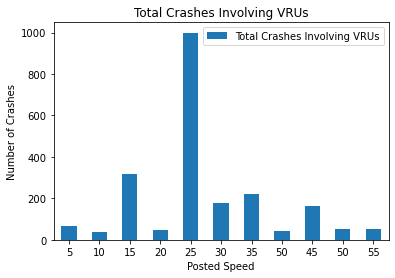

In [31]:
#Bar graph of total crashes involving VRUs sorted by posted speed
VRU_5 = VRU['5_mph'].sum()
VRU_10 = VRU['10_mph'].sum() 
VRU_15 = VRU['15_mph'].sum()
VRU_20 = VRU['20_mph'].sum() 
VRU_25 = VRU['25_mph'].sum() 
VRU_30 = VRU['30_mph'].sum()
VRU_35 = VRU['35_mph'].sum()
VRU_40 = VRU['40_mph'].sum()
VRU_45 = VRU['45_mph'].sum() 
VRU_50 = VRU['50_mph'].sum()
VRU_55 = VRU['55_mph'].sum()
VRU_60 = VRU['60_mph'].sum() 
df = pd.DataFrame({'Posted Speed':[5,10,15,20,25,30,35,50,45,50,55], 'Total Crashes Involving VRUs':[VRU_5,VRU_10,VRU_15,VRU_20,VRU_25,VRU_30,VRU_35,VRU_40,VRU_45,VRU_50,VRU_55]})
ax = df.plot.bar(x='Posted Speed', y='Total Crashes Involving VRUs', rot=0)

plt.title('Total Crashes Involving VRUs')
plt.xlabel('Posted Speed')
plt.ylabel('Number of Crashes')

In [16]:
fatality_VRU = VRU[VRU['Fatality'] == 1]
print(fatality_VRU)

                INCID_NO  NUM_OCC  5_mph  10_mph  15_mph  20_mph  25_mph  \
3462    BAWA030822224400      1.0    0.0     0.0     0.0     0.0     0.0   
3513    BAWA030919222300      0.0    0.0     0.0     0.0     0.0     0.0   
3627    BAWA031104232100      1.0    0.0     0.0     0.0     0.0     0.0   
4561    BAWA060415060700      1.0    0.0     0.0     0.0     0.0     0.0   
5674    BAWA071229024700      3.0    0.0     0.0     0.0     0.0     0.0   
5811    BAWA080419212100      0.0    0.0     0.0     0.0     0.0     0.0   
6420    BAWA090210193900      2.0    0.0     0.0     0.0     0.0     0.0   
6668    BAWA090804211100      5.0    0.0     0.0     0.0     0.0     0.0   
14387   BAWA941226181600      1.0    0.0     0.0     0.0     0.0     0.0   
14400   BAWA950103173100      1.0    0.0     0.0     0.0     0.0     0.0   
27294     BWMP0200025844      1.0    0.0     0.0     0.0     0.0     0.0   
27318     BWMP0200026932      0.0    0.0     0.0     0.0     0.0     0.0   
27972     BW

In [23]:
VRUfatal_5 = fatality_VRU['5_mph'].sum()
VRUfatal_10 = fatality_VRU['10_mph'].sum() 
VRUfatal_15 = fatality_VRU['15_mph'].sum() 
VRUfatal_20 = fatality_VRU['20_mph'].sum() 
VRUfatal_25 = fatality_VRU['25_mph'].sum() 
VRUfatal_30 = fatality_VRU['30_mph'].sum() 
VRUfatal_35 = fatality_VRU['35_mph'].sum() 
VRUfatal_40 = fatality_VRU['40_mph'].sum() 
VRUfatal_45 = fatality_VRU['45_mph'].sum()
VRUfatal_50 = fatality_VRU['50_mph'].sum()
VRUfatal_55 = fatality_VRU['55_mph'].sum()

In [26]:
VRU_fatal_postedspeed= {'Posted Speed': ['5 mph', '10 mph', '15 mph', '20 mph', '25 mph', '30 mph', '35 mph', '40 mph', '45 mph', '50 mph', '55 mph'], 'Number of Fatalities':[VRUfatal_5, VRUfatal_10, VRUfatal_15, VRUfatal_20, VRUfatal_25, VRUfatal_30, VRUfatal_35, VRUfatal_40, VRUfatal_45, VRUfatal_50, VRUfatal_55]}

In [27]:
df6 = pd.DataFrame(VRU_fatal_postedspeed)
print(df6)

   Posted Speed  Number of Fatalities
0         5 mph                   0.0
1        10 mph                   0.0
2        15 mph                   0.0
3        20 mph                   0.0
4        25 mph                   7.0
5        30 mph                   0.0
6        35 mph                   7.0
7        40 mph                   2.0
8        45 mph                  15.0
9        50 mph                   2.0
10       55 mph                   9.0


In [16]:
# No. pedestrian fatalities and posted speed
#Repeated same process as done for VRU. First construct dataframe that pulls all crashes related to Pedestrian 
pedestrian = analysis_2022[analysis_2022['Pedestrian'] == 1]

#Within that dataframe, construct a dataframe where pedestrian-related crashes had fatalities 
fatalped = pedestrian[pedestrian['Fatality'] == 1]

#Now define variables to capture pedestrian fatalities by posted speed
pedfatal_5 = fatalped['5_mph'].sum()
pedfatal_10 = fatalped['10_mph'].sum() 
pedfatal_15 = fatalped['15_mph'].sum() 
pedfatal_20 = fatalped['20_mph'].sum() 
pedfatal_25 = fatalped['25_mph'].sum() 
pedfatal_30 = fatalped['30_mph'].sum() 
pedfatal_35 = fatalped['35_mph'].sum() 
pedfatal_40 = fatalped['40_mph'].sum() 
pedfatal_45 = fatalped['45_mph'].sum()
pedfatal_50 = fatalped['50_mph'].sum()
pedfatal_55 = fatalped['55_mph'].sum()
pedfatal_60 = fatalped['60_mph'].sum()
pedfatal_65 = fatalped['65_mph'].sum()
pedfatal_70 = fatalped['70_mph'].sum() 

#Create a table that lists number of pedestrian fatalities by posted speed 
pedfatal_postedspeed= {'Posted Speed': ['5 mph', '10 mph', '15 mph', '20 mph', '25 mph', '30 mph', '35 mph', '40 mph', '45 mph', '50 mph', '55 mph', '60 mph', '65 mph', '70 mph'], 'Number of Fatalities':[pedfatal_5, pedfatal_10, pedfatal_15, pedfatal_20, pedfatal_25, pedfatal_30, pedfatal_35, pedfatal_40, pedfatal_45, pedfatal_50, pedfatal_55, pedfatal_60, pedfatal_65, pedfatal_70]}
df7 = pd.DataFrame(pedfatal_postedspeed)
print(df7)

   Posted Speed  Number of Fatalities
0         5 mph                   0.0
1        10 mph                   0.0
2        15 mph                   0.0
3        20 mph                   0.0
4        25 mph                   7.0
5        30 mph                   0.0
6        35 mph                   6.0
7        40 mph                   2.0
8        45 mph                  13.0
9        50 mph                   1.0
10       55 mph                   9.0
11       60 mph                   0.0
12       65 mph                   0.0
13       70 mph                   0.0


In [18]:
# No. of cyclist fatalities by posted speed
#Repeated same process as done for VRU. First construct dataframe that pulls all crashes related to cyclists 
cyclists = analysis_2022[analysis_2022['Bicycle'] == 1]

#Within that dataframe, construct a dataframe where cyclist-related crashes had fatalities 
fatalcyc = cyclists[cyclists['Fatality'] == 1]

#Now define variables to capture pedestrian fatalities by posted speed
cycfatal_5 = fatalcyc['5_mph'].sum()
cycfatal_10 = fatalcyc['10_mph'].sum() 
cycfatal_15 = fatalcyc['15_mph'].sum() 
cycfatal_20 = fatalcyc['20_mph'].sum() 
cycfatal_25 = fatalcyc['25_mph'].sum() 
cycfatal_30 = fatalcyc['30_mph'].sum() 
cycfatal_35 = fatalcyc['35_mph'].sum() 
cycfatal_40 = fatalcyc['40_mph'].sum() 
cycfatal_45 = fatalcyc['45_mph'].sum()
cycfatal_50 = fatalcyc['50_mph'].sum()
cycfatal_55 = fatalcyc['55_mph'].sum()
cycfatal_60 = fatalcyc['60_mph'].sum()
cycfatal_65 = fatalcyc['65_mph'].sum()
cycfatal_70 = fatalcyc['70_mph'].sum() 

#Create a table that lists number of cyclist fatalities by posted speed 
cycfatal_postedspeed= {'Posted Speed': ['5 mph', '10 mph', '15 mph', '20 mph', '25 mph', '30 mph', '35 mph', '40 mph', '45 mph', '50 mph', '55 mph', '60 mph', '65 mph', '70 mph'], 'Number of Fatalities':[cycfatal_5, cycfatal_10, cycfatal_15, cycfatal_20, cycfatal_25, cycfatal_30, cycfatal_35, cycfatal_40, cycfatal_45, cycfatal_50, pedfatal_55, cycfatal_60, cycfatal_65, cycfatal_70]}
df8 = pd.DataFrame(cycfatal_postedspeed)
print(df8)

   Posted Speed  Number of Fatalities
0         5 mph                   0.0
1        10 mph                   0.0
2        15 mph                   0.0
3        20 mph                   0.0
4        25 mph                   0.0
5        30 mph                   0.0
6        35 mph                   1.0
7        40 mph                   0.0
8        45 mph                   2.0
9        50 mph                   1.0
10       55 mph                   9.0
11       60 mph                   0.0
12       65 mph                   0.0
13       70 mph                   0.0


Text(0, 0.5, 'Number of Fatalities')

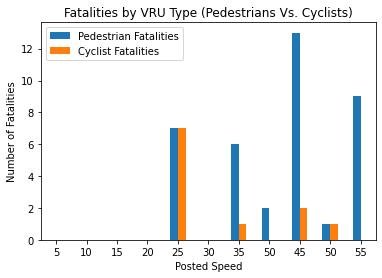

In [28]:
#Pie chart/bar graph of fatalities by VRU type (peds vs. cyclists)
postedspeed_index = [5,10,15,20,25,30,35,50,45,50,55]
df = pd.DataFrame({'Pedestrian Fatalities':[pedfatal_5,pedfatal_10,pedfatal_15,pedfatal_20,pedfatal_25,pedfatal_30,pedfatal_35,pedfatal_40,pedfatal_45,pedfatal_50,pedfatal_55], 'Cyclist Fatalities':[cycfatal_5,cycfatal_10,cycfatal_15,cycfatal_20,pedfatal_25,cycfatal_30,cycfatal_35,cycfatal_40,cycfatal_45,cycfatal_50,cycfatal_55]}, index = postedspeed_index)
ax = df.plot.bar(rot=0)

plt.title('Fatalities by VRU Type (Pedestrians Vs. Cyclists)')
plt.xlabel('Posted Speed')
plt.ylabel('Number of Fatalities')

In [35]:
#Bar graph of VRU fatalities AND injuries combined sorted by posted speed 
#Is "Injury or Fatal" same as injury and fatalities combined? Question for Eric and Sophie 
injuryandfatality_VRU = VRU[VRU['Injury or Fatal'] == 1]
print(injuryandfatality_VRU)

                INCID_NO  NUM_OCC  5_mph  10_mph  15_mph  20_mph  25_mph  \
348     ACAD090421120000     14.0    0.0     0.0     0.0     0.0     0.0   
580       ACAD8900006028      4.0    0.0     0.0     0.0     0.0     1.0   
1360      ACAD9900000944      0.0    0.0     0.0     0.0     0.0     0.0   
1416    ACAD990930100000      0.0    0.0     0.0     0.0     0.0     0.0   
1987      ASIS0100000341      2.0    0.0     0.0     0.0     0.0     0.0   
...                  ...      ...    ...     ...     ...     ...     ...   
205402        NP20077087      3.0    0.0     0.0     0.0     0.0     0.0   
205467        NP20082987      2.0    0.0     0.0     0.0     0.0     0.0   
205725        NP20101607      1.0    0.0     0.0     0.0     0.0     0.0   
205730        NP20102165      2.0    0.0     0.0     1.0     0.0     0.0   
205968        PP20056040      3.0    0.0     0.0     0.0     0.0     0.0   

        30_mph  35_mph  40_mph  ...  OtherDomestic  Involving Animal  \
348        0.0 

In [ ]:
#Bar graph of total crashes involving VRUs occurring at crosswalks vs. locations other than crosswalks

# Regional Briefing Data Overview - Loop 

In [44]:
regions = analysis_2022.RGN.unique()
print(regions)

['SER' 'NER' 'MWR' 'IMR' 'NCR' 'PWR' 'AKR']


SER
       Collision Type  Number of Injuries  Number of Fatalities
0  Collision w Animal               614.0                   8.0
1     Avoiding Animal                 2.0                   0.0
2          Pedestrian                59.0                   2.0
3             Bicycle                99.0                   0.0
4           Pedacycle                 0.0                   0.0
NER
       Collision Type  Number of Injuries  Number of Fatalities
0  Collision w Animal               438.0                   2.0
1     Avoiding Animal                 0.0                   0.0
2          Pedestrian                64.0                   1.0
3             Bicycle                82.0                   4.0
4           Pedacycle                 1.0                   0.0
IMR
       Collision Type  Number of Injuries  Number of Fatalities
0  Collision w Animal               349.0                   4.0
1     Avoiding Animal                 1.0                   0.0
2          Pedestrian       

C:\Users\Smitha.Mahesh\AppData\Local\Temp\ipykernel_9788\3782376735.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2.append(df2[['Number of Injuries', 'Number of Fatalities']].sum().rename('Servicewide Total')).fillna('')
C:\Users\Smitha.Mahesh\AppData\Local\Temp\ipykernel_9788\3782376735.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2.append(df2[['Number of Injuries', 'Number of Fatalities']].sum().rename('Servicewide Total')).fillna('')
C:\Users\Smitha.Mahesh\AppData\Local\Temp\ipykernel_9788\3782376735.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2.append(df2[['Number of Injuries', 'Number of Fatalities']].sum().rename('Servicewide Total')).fillna('')
C:\Users\Smitha.Mahesh\AppData\Local\Temp\i

       Collision Type  Number of Injuries  Number of Fatalities
0  Collision w Animal                78.0                   0.0
1     Avoiding Animal                 3.0                   0.0
2          Pedestrian               157.0                  12.0
3             Bicycle               211.0                   0.0
4           Pedacycle                 0.0                   0.0
PWR
       Collision Type  Number of Injuries  Number of Fatalities
0  Collision w Animal                81.0                   4.0
1     Avoiding Animal                 0.0                   0.0
2          Pedestrian               132.0                   1.0
3             Bicycle               253.0                   1.0
4           Pedacycle                 0.0                   0.0
AKR
       Collision Type  Number of Injuries  Number of Fatalities
0  Collision w Animal                 0.0                   0.0
1     Avoiding Animal                 0.0                   0.0
2          Pedestrian           

C:\Users\Smitha.Mahesh\AppData\Local\Temp\ipykernel_9788\3782376735.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2.append(df2[['Number of Injuries', 'Number of Fatalities']].sum().rename('Servicewide Total')).fillna('')
C:\Users\Smitha.Mahesh\AppData\Local\Temp\ipykernel_9788\3782376735.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2.append(df2[['Number of Injuries', 'Number of Fatalities']].sum().rename('Servicewide Total')).fillna('')


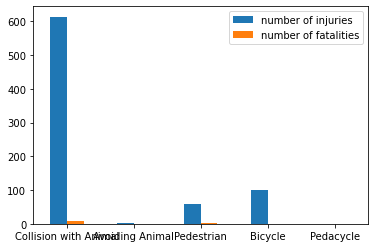

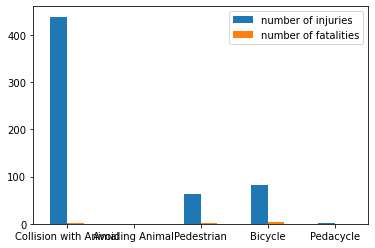

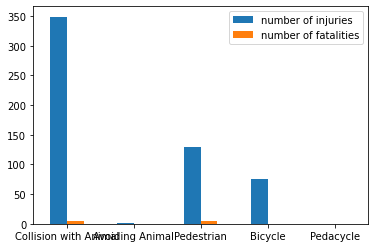

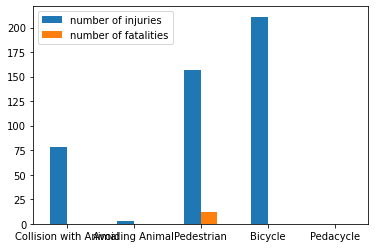

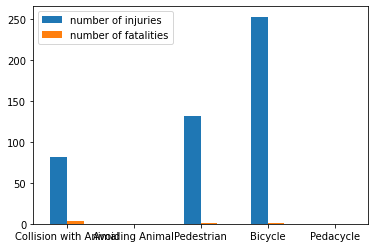

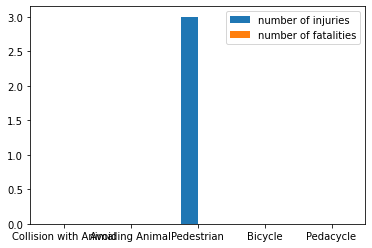

In [123]:
region = ['SER', 'NER', 'IMR', 'NCR', 'PWR', 'AKR']
for index, item in enumerate(region):
    regionabrv = region[index]
    print(regionabrv)
    regional_analysis_df = analysis_2022[analysis_2022['RGN'] == regionabrv]
    
    #Finding Count of Injuries or Fatalities by Collision with Animal
    RGN_collisionwanimal = regional_analysis_df[regional_analysis_df['Collision w Animal'] == 1]
    RGNnuminjuries_collisionwanimals = RGN_collisionwanimal['Num_Injuries'].sum()
    RGNnumfatalities_collisionwanimals = RGN_collisionwanimal['Num_Fatalities'].sum()
    
    #Finding Count of Injuries or Fatalities by Avoiding Animal
    RGN_avoidinganimals = regional_analysis_df[regional_analysis_df['Avoiding Animal'] == 1]
    RGNnumfatalities_avoidinganimals = RGN_avoidinganimals['Num_Fatalities'].sum()
    RGNnuminjuries_avoidinganimals = RGN_avoidinganimals['Num_Injuries'].sum()
    
    #Finding Count of Injuries or Fatalities by Pedestrians 
    RGN_pedestrians = regional_analysis_df[regional_analysis_df['Pedestrian'] == 1]
    RGNpedinjuries = RGN_pedestrians['Num_Injuries'].sum()
    RGNpedfatal = RGN_pedestrians['Num_Fatalities'].sum()
    
    #Finding Count of Injuries or Fatalities by Bicyclists  
    RGN_bicyclists = regional_analysis_df[regional_analysis_df['Bicycle'] == 1]
    RGNbikeinjuries = RGN_bicyclists['Num_Injuries'].sum()
    RGNbikefatal = RGN_bicyclists['Num_Fatalities'].sum()
    
    #Finding Count of Injuries or Fatalities by Pedacyclists 
    RGN_pedacycle = regional_analysis_df[regional_analysis_df['Pedacycle'] == 1]
    RGNpedacycleinjuries = RGN_pedacycle['Num_Injuries'].sum()
    RGNpedacyclefatal = RGN_pedacycle['Num_Fatalities'].sum() 
    
    #Creating table from data 
    RGNdata= {'Collision Type': ['Collision w Animal','Avoiding Animal', 'Pedestrian','Bicycle','Pedacycle'], 'Number of Injuries':[RGNnuminjuries_collisionwanimals, RGNnuminjuries_avoidinganimals, RGNpedinjuries, RGNbikeinjuries, RGNpedacycleinjuries], 'Number of Fatalities':[RGNnumfatalities_collisionwanimals,RGNnumfatalities_avoidinganimals, RGNpedfatal, RGNbikefatal, RGNpedacyclefatal]}
    df2 = pd.DataFrame(RGNdata)
    print(df2)
    df2[['Number of Injuries', 'Number of Fatalities']].sum()
    df2.append(df2[['Number of Injuries', 'Number of Fatalities']].sum().rename('Servicewide Total')).fillna('')
    #NEED HELP: Servicewide Total Won't Show
    
    #Creating bar graph from data 
    injuries = [RGNnuminjuries_collisionwanimals, RGNnuminjuries_avoidinganimals, RGNpedinjuries, RGNbikeinjuries, RGNpedacycleinjuries]
    fatalities = [RGNnumfatalities_collisionwanimals, RGNnumfatalities_avoidinganimals, RGNpedfatal, RGNbikefatal, RGNpedacyclefatal]
    index = ['Collision with Animal', 'Avoiding Animal', 'Pedestrian', 'Bicycle', 'Pedacycle']
    df3 = pd.DataFrame({'number of injuries': injuries, 'number of fatalities':fatalities}, index=index)
    
    ax = df3.plot.bar(rot=0)
    #NEED HELP: Fix size of bar graphs so everything isn't squished 

### Crashes Involving Pedestrians 

#### Computing % of Crashes Involving Pedestrians 

In [89]:
analysis_2022['Pedestrian'].value_counts().sort_index()

0    840650
1      6501
Name: Pedestrian, dtype: int64

In [90]:
pedestrian_total_crashes = 6501
print(pedestrian_total_crashes)

6501


In [91]:
analysis_2022.shape

(847151, 56)

In [92]:
pedestrian_percentage = round(pedestrian_total_crashes/847151,3)*100
pedestrian_percentage

0.8

#### Computing % of Injury/Fatality Involving Pedestrians

In [93]:
#First find the number of injury/fatalities involving pedestrians 
analysis_2022.value_counts(["Pedestrian", "Injury or Fatal"])

Pedestrian  Injury or Fatal
0           0                  666623
            1                  174027
1           0                    3451
            1                    3050
dtype: int64

In [94]:
#Pedestrian = 1 and Injury or Fatal = 1 means crash involving pedestrian resulted in injury or fatality 
pedestrian_counts= 3050
print (pedestrian_counts)

3050


In [95]:
#Percentage of Injury/Fatality for Pedestrians
pedestrian_injuryfatality_percentage = round(pedestrian_counts/pedestrian_total_crashes, 3)*100
pedestrian_injuryfatality_percentage

46.9

#### No. Fatalities Involving Pedestrians - avoiding this code for now so as not to repeat error code... 

## Crashes Involving Cyclists 

#### Computing % of Crashes Involving Cyclists 

In [96]:
analysis_2022['Bicycle'].value_counts().sort_index()

0    840685
1      6466
Name: Bicycle, dtype: int64

In [97]:
cyclists_total_crashes = 6466
print(cyclists_total_crashes)

6466


In [98]:
analysis_2022.shape

(847151, 56)

In [99]:
cyclists_percentage = round(cyclists_total_crashes/847151,3)*100
cyclists_percentage

0.8

#### Computing % of Injury/Fatality Involving Cyclists 

In [100]:
#First find the number of injury/fatalities involving cyclists 
analysis_2022.value_counts(["Bicycle", "Injury or Fatal"])

Bicycle  Injury or Fatal
0        0                  667219
         1                  173466
1        1                    3611
         0                    2855
dtype: int64

In [101]:
#Bicycle = 1 and Injury or Fatal = 1 means crash involving bicycle resulted in injury or fatality
cyclists_counts= 3611
print (cyclists_counts)

3611


In [102]:
#Percentage of Injury/Fatality Involving Cyclists
cyclists_injuryfatality_percentage = round(cyclists_counts/cyclists_total_crashes, 3)*100
cyclists_injuryfatality_percentage

55.800000000000004

#### No. Fatalities Involving Cyclists - avoiding this code for now so as not to repeat error code... 

#### Table of Crash Class and Severity - NOT READY NOT, WORK IN PROGRESS 

In [103]:
print("For an NPS service wide perspective, the TSP has aggregated available crash data from 1990 – 2020.  Available below is a list of the most common crash classifications for that time period servicewide for crashes that resulted in a fatality or an injury. A key take away is")

For an NPS service wide perspective, the TSP has aggregated available crash data from 1990 – 2020.  Available below is a list of the most common crash classifications for that time period servicewide for crashes that resulted in a fatality or an injury. A key take away is


In [104]:
#Template of code for table but got to figure out values for percentage of total crashes
#Values for 100 are fake, will be replaced soon, just put in for sake of balancing table
data= {'Collision Type': ['Collision w Animal','Avoiding Animal','Pedestrian', 'Bicycle'], 'Percentage of Total Crashes': [collision_with_animal_percentage,avoiding_animal_percentage,pedestrian_percentage,cyclists_percentage], 'Percentage in Fatality or Injury':[Collisionwanimal_injury_or_fatal, avoiding_animal_injuryfatality_percentage,pedestrian_injuryfatality_percentage,cyclists_injuryfatality_percentage]}

In [105]:
df = pd.DataFrame(data)

In [106]:
print(df)

       Collision Type  Percentage of Total Crashes  \
0  Collision w Animal                        3.100   
1     Avoiding Animal                        0.008   
2          Pedestrian                        0.800   
3             Bicycle                        0.800   

   Percentage in Fatality or Injury  
0                               6.7  
1                               9.2  
2                              46.9  
3                              55.8  


### Next section will construction bar graph of fatalities and injuries sorted by posted speed 


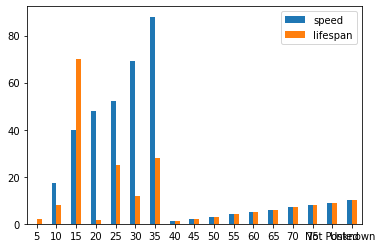

In [32]:
#TEMPLATED EXAMPLE 
fatalities = [0.1, 17.5, 40, 48, 52, 69, 88, 1,2,3,4,5,6,7,8,9,10]
injuries = [2, 8, 70, 1.5, 25, 12, 28, 1,2,3,4,5,6,7,8,9,10]
index = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)
#TEMPLATE NEED TO ADJUST - first one tests on fatalities and injuries 